# Analyzing Customer Satisfaction Across Travel Classes: A Data Science Perspective

###### Researcher: Gerald Macherechedze
###### Bcom Honors Information System Student
###### 2024 

## Getting started 

In [2]:
# Import necessary libraries 

import pandas as pd
import seaborn as sns #Data Visualization Library 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# Read the file

# df = pd.read_csv("C:\\Users\\client\\Downloads\\interstellar_travel.csv")
df = pd.read_csv("C:\\Users\\mobil\\OneDrive - University of Johannesburg\\UJ E-Books\\Bcom Hons IS\\interstellar_travel.csv")

### About My Data 

This study is interesting because it explores the intersection of travel and food security, two crucial aspects of modern life. By analyzing the duration of stay during travel alongside factors like household size, dietary diversity, and income, the research sheds light on how different variables influence food security in transient environments. Understanding these dynamics can inform policies and interventions aimed at improving food security for travellers, highlighting the significance of this study in addressing a pressing societal issue.


#### Dataset Overview
Nuf Records: ~500,000.

Target Variable: Customer Satisfaction Score

#### Features
The dataset includes a variety of features that can be leveraged for in-depth analysis and predictive modeling:

Age: Age of the traveler.

Gender: Gender of the traveler.

Occupation: Occupation of the traveler, such as Colonist, Tourist, Businessperson, etc.

Travel Class: Class of travel, e.g., Business, Economy, Luxury.

Destination: Interstellar destination.

Star System: Star system of the destination.

Distance to Destination (Light-Years): The distance to the destination measured in light-years.

Duration of Stay (Earth Days): Duration of stay at the destination in Earth days.

Number of Companions: The number of companions accompanying the traveler.

Purpose of Travel: The primary purpose of travel, e.g., Tourism, Research, Colonization.

Transportation Type: Type of transportation, e.g., Warp Drive, Solar Sailing, Ion Thruster.

Price (Galactic Credits): Price of the trip in Galactic Credits.

Booking Date: Date when the trip was booked.

Departure Date: Date of departure.

Special Requests: Any special requests made by the traveler.

Loyalty Program Member: Indicates if the traveler is a member of a loyalty program.

Month: Month of travel. 

To access the dataset please navigate to Resources.

### Data Processing 

In [7]:
# Top records of the dataset

df.head()

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score
0,14,Female,Colonist,Business,Gliese 581,Cunningham Mountains,1.09,11.0,5,Tourism,Warp Drive,828.949275,2023-09-17,2025-01-07,Other,No,9,105.0
1,22,Male,Tourist,Economy,Alpha Centauri,Hayes Trace,5.70,23.0,0,Research,Solar Sailing,488.469135,2023-03-31,2025-12-26,Other,No,3,102.0
2,62,Female,Businessperson,Luxury,Alpha Centauri,Anna Port,0.37,4.0,1,Tourism,Ion Thruster,183.745881,2022-05-19,2025-01-04,NaN,Yes,5,100.0
3,21,Female,Colonist,Economy,Lalande 21185,Henry Ville,0.32,23.0,1,Tourism,Warp Drive,358.754000,2023-04-13,2024-02-09,NaN,No,4,108.0
4,42,Male,Explorer,Luxury,Exotic Destination 10,Graves Mall,6.17,42.0,1,Colonization,Ion Thruster,3073.759920,2023-06-12,2024-03-15,Special Meal,No,6,97.0


In [6]:
# Check for number of columns
df.columns

Index(['Age', 'Gender', 'Occupation', 'Travel Class', 'Destination',
       'Star System', 'Distance to Destination (Light-Years)',
       'Duration of Stay (Earth Days)', 'Number of Companions',
       'Purpose of Travel', 'Transportation Type', 'Price (Galactic Credits)',
       'Booking Date', 'Departure Date', 'Special Requests',
       'Loyalty Program Member', 'Month', 'Customer Satisfaction Score'],
      dtype='object')

In [21]:
# Check for missing values 

df.isnull().sum()

Age                                           0
Gender                                        0
Occupation                                    0
Travel Class                                  0
Destination                                   0
Star System                                   0
Distance to Destination (Light-Years)         0
Duration of Stay (Earth Days)                 0
Number of Companions                          0
Purpose of Travel                             0
Transportation Type                           0
Price (Galactic Credits)                      0
Booking Date                                  0
Departure Date                                0
Special Requests                         109350
Loyalty Program Member                        0
Month                                         0
Customer Satisfaction Score                   0
dtype: int64

dropna() is used to drop rows or columns with missing values.
axis=1 specifies that you want to drop columns with missing values.
inplace=True modifies the DataFrame in place, without the need for reassignment.

In [30]:
# Dropping the entire column with missing values 

df.dropna(axis=1, inplace=True)
df.isnull().sum()

Age                                      0
Gender                                   0
Occupation                               0
Travel Class                             0
Destination                              0
Star System                              0
Distance to Destination (Light-Years)    0
Duration of Stay (Earth Days)            0
Number of Companions                     0
Purpose of Travel                        0
Transportation Type                      0
Price (Galactic Credits)                 0
Booking Date                             0
Departure Date                           0
Loyalty Program Member                   0
Month                                    0
Customer Satisfaction Score              0
dtype: int64

In [36]:
# Check for information concerning the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547568 entries, 0 to 547567
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Age                                    547568 non-null  int64  
 1   Gender                                 547568 non-null  object 
 2   Occupation                             547568 non-null  object 
 3   Travel Class                           547568 non-null  object 
 4   Destination                            547568 non-null  object 
 5   Star System                            547568 non-null  object 
 6   Distance to Destination (Light-Years)  547568 non-null  float64
 7   Duration of Stay (Earth Days)          547568 non-null  float64
 8   Number of Companions                   547568 non-null  int64  
 9   Purpose of Travel                      547568 non-null  object 
 10  Transportation Type                    547568 non-null  

In [48]:
# Classification

df.groupby('Travel Class')['Travel Class'].agg("count")

Travel Class
Business    173761
Economy     300679
Luxury       73128
Name: Travel Class, dtype: int64

In [56]:
# Check for the unique values in the column "Travel Class"

df['Travel Class'].unique()

array(['Business', 'Economy', 'Luxury'], dtype=object)

<Axes: >

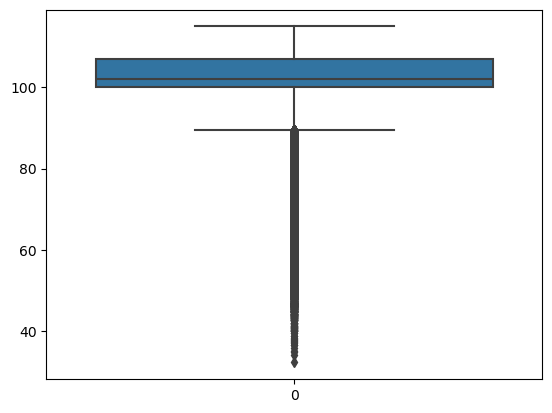

In [51]:
# Check for outliers (Exaggerated numbers) 

sns.boxplot(df["Customer Satisfaction Score"])

In [23]:
# Select the maximum quantile to fill in the outliers

max_css = df["Customer Satisfaction Score"].quantile(0.995)
max_css

115.0

In [24]:
df[df["Customer Satisfaction Score"] > max_css]

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score


In [63]:
# Check for duplicate values

df.duplicated().sum()

0

In [4]:

travel_class_map = {"Luxury": 1, "Business": 2, "Economy": 3}

df["Travel Class"].fillna("Unknown", inplace=True)

df["travel_class_numerical"] = df["Travel Class"].map(travel_class_map)

print(df.head())

   Age  Gender      Occupation Travel Class            Destination  \
0   14  Female        Colonist     Business             Gliese 581   
1   22    Male         Tourist      Economy         Alpha Centauri   
2   62  Female  Businessperson       Luxury         Alpha Centauri   
3   21  Female        Colonist      Economy          Lalande 21185   
4   42    Male        Explorer       Luxury  Exotic Destination 10   

            Star System  Distance to Destination (Light-Years)  \
0  Cunningham Mountains                                   1.09   
1           Hayes Trace                                   5.70   
2             Anna Port                                   0.37   
3           Henry Ville                                   0.32   
4           Graves Mall                                   6.17   

   Duration of Stay (Earth Days)  Number of Companions Purpose of Travel  \
0                           11.0                     5           Tourism   
1                           23

In [7]:
# Save new cleaned dataset

df.to_csv("Cleaned_data.csv")

## Statistical Calculations 

### Mean Analysis: Exploring Customer Satisfaction 

In [57]:
1
# Calculate mean
mean_value = df['Customer Satisfaction Score'].mean()
print("Mean:", mean_value)

Mean: 101.66011240613038


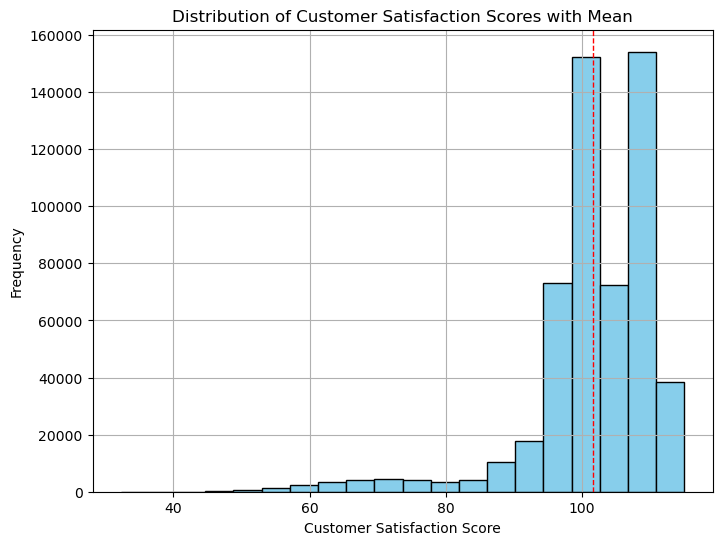

In [10]:
# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['Customer Satisfaction Score'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Satisfaction Scores with Mean')
plt.grid(True)
plt.show()

In [63]:
2
# Calculate mode
mode_value = df['Customer Satisfaction Score'].mode()
print("Mode:", mode_value)

Mode: 0    102.0
Name: Customer Satisfaction Score, dtype: float64


In [26]:
3
# Calculate range
range_value = df['Customer Satisfaction Score'].max() - df['Customer Satisfaction Score'].min()
print("Range:", range_value)

Range: 82.75


In [27]:
4
# Calculate variance
variance_value = df['Customer Satisfaction Score'].var()
print("Variance:", variance_value)

Variance: 86.35355161509551


In [59]:
5
# Calculate standard deviation
std_dev_value = df['Customer Satisfaction Score'].std()
print("Standard Deviation:", std_dev_value)

Standard Deviation: 9.2926611697132


In [88]:
6
# Calculate skewness
skewness_value = df['Customer Satisfaction Score'].skew()
print("Skewness:", skewness_value)

Skewness: -2.3787837886749217


In [89]:
7
# Calculate kurtosis
kurtosis_value = df['Customer Satisfaction Score'].kurtosis()
print("Kurtosis:", kurtosis_value)

Kurtosis: 7.7528793358913894


In [90]:
8
# Calculate median
median_value = df['Customer Satisfaction Score'].median()
print("Median:", median_value)

Median: 102.0


In [92]:
9
# Calculate minimum value
min_value = df['Customer Satisfaction Score'].min()
print("Minimum:", min_value)

Minimum: 32.25


In [93]:
10
# Calculate maximum value
max_value = df['Customer Satisfaction Score'].max()
print("Maximum:", max_value)

Maximum: 115.0


In [94]:
11
# Calculate 25th percentile (Q1)
q1_value = df['Customer Satisfaction Score'].quantile(0.25)
print("Q1 (25th percentile):", q1_value)

Q1 (25th percentile): 100.0


### Quantile 3

In [95]:
12
# Calculate 75th percentile (Q3)
q3_value = df['Customer Satisfaction Score'].quantile(0.75)
print("Q3 (75th percentile):", q3_value)

Q3 (75th percentile): 107.0


75% of the customers had a satisfaction score of 107 or lower.

In [96]:
13
# Calculate Interquartile Range (IQR)
iqr_value = q3_value - q1_value
print("Interquartile Range (IQR):", iqr_value)

Interquartile Range (IQR): 7.0


In [97]:
14
# Calculate sum
sum_value = df['Customer Satisfaction Score'].sum()
print("Sum:", sum_value)

Sum: 55665824.43


In [98]:
15 
# Calculate Coefficient of Variation
cv_value = (std_dev_value / mean_value) * 100
print("Coefficient of Variation:", cv_value)

Coefficient of Variation: 9.140911759559325


In [103]:
16 
# Calculate Weighted Mean           
# Assuming you have a weight column named 'Weights'
weighted_mean_value = np.average(df['Customer Satisfaction Score'])
print("Weighted Mean:", weighted_mean_value)

Weighted Mean: 101.66011240613038


In [104]:
17
# Calculate Geometric Mean
geometric_mean_value = stats.gmean(df['Customer Satisfaction Score'])
print("Geometric Mean:", geometric_mean_value)

Geometric Mean: 101.14673417727636


In [60]:
18
# Calculate Z-score
z_score_value = (df['Customer Satisfaction Score'] - mean_value) / std_dev_value
print("Z-score:", z_score_value)

Z-score: 0         0.359411
1         0.036576
2        -0.178648
3         0.682247
4        -0.501483
            ...   
547563   -0.178648
547564    1.435529
547565    0.036576
547566    0.359411
547567    0.574635
Name: Customer Satisfaction Score, Length: 547568, dtype: float64


In [106]:
19
# Count all values (including nulls)
count_all_values = len(df['Customer Satisfaction Score'])
print("Count of all values (including nulls):", count_all_values)

Count of all values (including nulls): 547568


In [107]:
20
# Calculate 25th percentile (Q1)
q2_value = df['Customer Satisfaction Score'].quantile(0.50)
print("Q2 (50th percentile):", q2_value)

Q2 (50th percentile): 102.0


## Data Visualization  

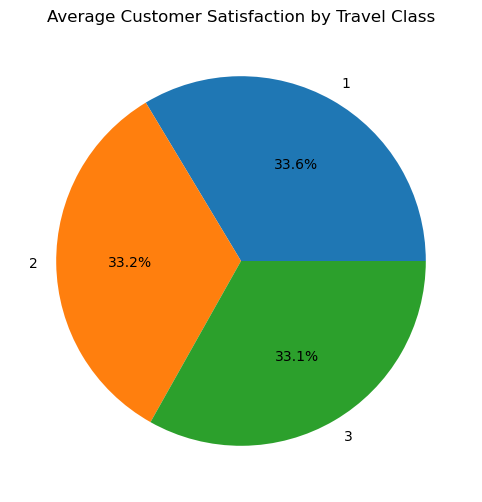

In [6]:
travel_class_satisfaction = df.groupby('travel_class_numerical')['Customer Satisfaction Score'].mean()

travel_class_labels = travel_class_satisfaction.index.to_numpy()  # Assuming numerical labels
satisfaction_scores = travel_class_satisfaction.to_numpy()


# pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(satisfaction_scores, labels=travel_class_labels, autopct="%1.1f%%")
plt.title("Average Customer Satisfaction by Travel Class")
plt.show()
    

In the chart Above:

1. Luxury class
2. Business Class 
3. Economy Class 

### Distribution of Customer Satisfaction Scores

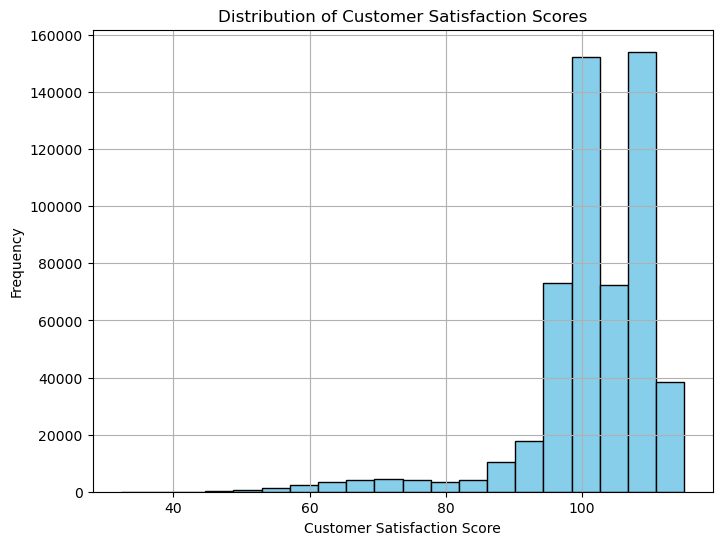

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['Customer Satisfaction Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Satisfaction Scores')
plt.grid(True)
plt.show()

### Boxplot of Customer Satisfaction Scores

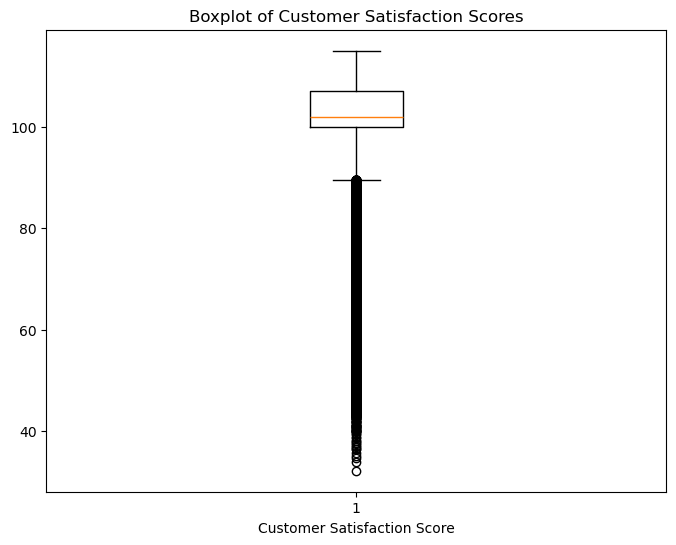

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Customer Satisfaction Score'])
plt.xlabel('Customer Satisfaction Score')
plt.title('Boxplot of Customer Satisfaction Scores')
plt.show()


### Violin Plot of Customer Satisfaction Scores

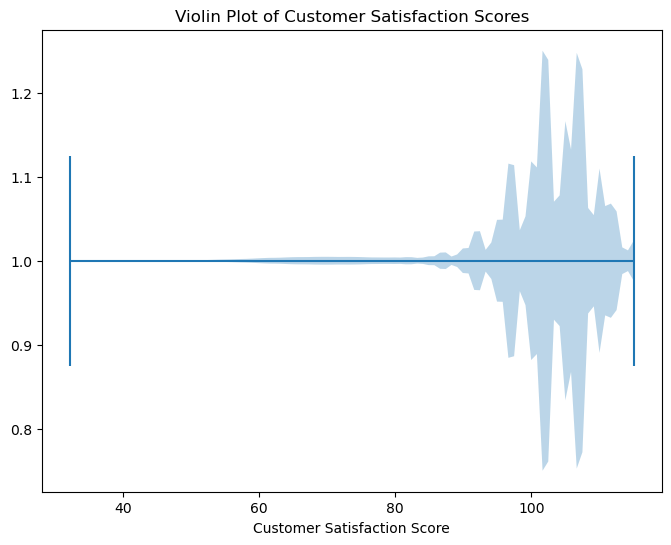

In [14]:
# Plotting
plt.figure(figsize=(8, 6))
plt.violinplot(df['Customer Satisfaction Score'], vert=False)
plt.xlabel('Customer Satisfaction Score')
plt.title('Violin Plot of Customer Satisfaction Scores')
plt.show()


### Empirical Cumulative Distribution Function

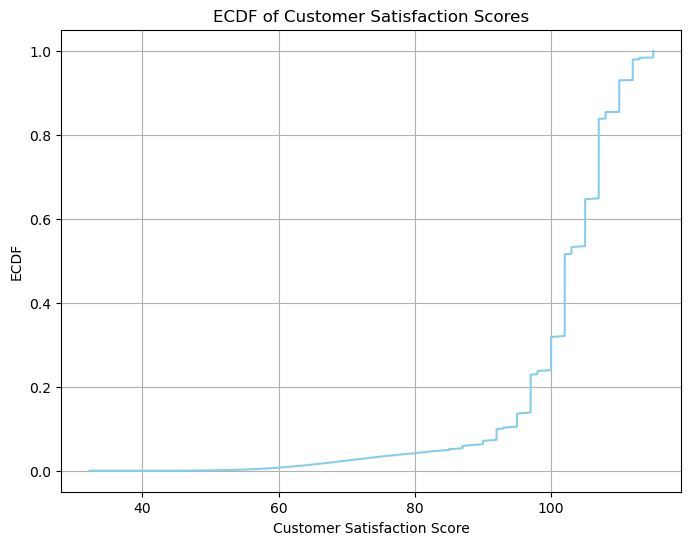

In [18]:
plt.figure(figsize=(8, 6))
sorted_data = np.sort(df['Customer Satisfaction Score'])
yvals = np.arange(len(sorted_data))/float(len(sorted_data))
plt.plot(sorted_data, yvals, color='skyblue')
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('ECDF')
plt.title('ECDF of Customer Satisfaction Scores')
plt.grid(True)
plt.show()

### Kernel Density Estimate (KDF)

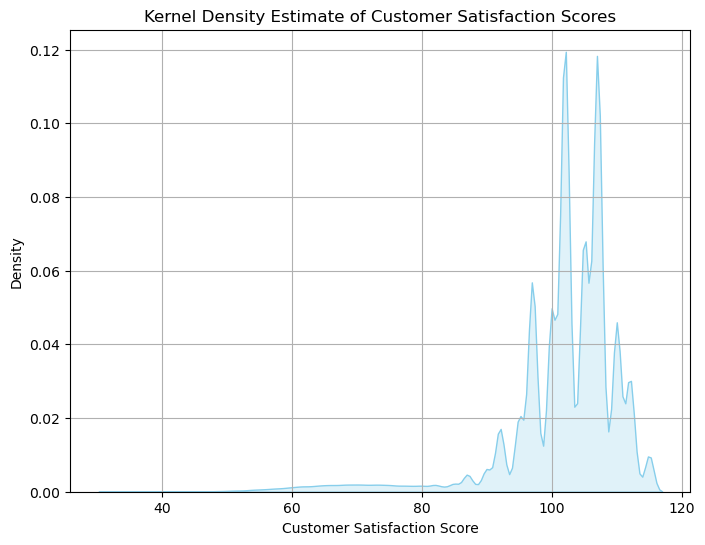

In [56]:
# Surpress Warning 
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated") 

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Customer Satisfaction Score'], fill=True, color='skyblue')  # Update shade to fill
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Customer Satisfaction Scores')
plt.grid(True)
plt.show()

### Cumulative Distribution Function (CDF)

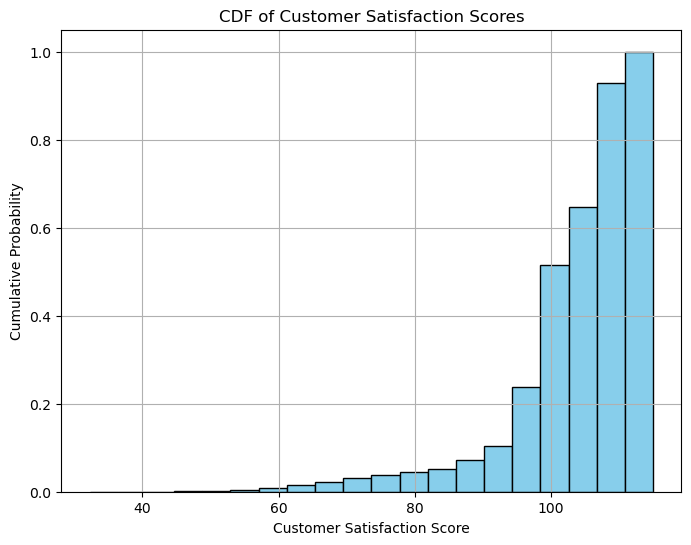

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(df['Customer Satisfaction Score'], bins=20, color='skyblue', edgecolor='black', cumulative=True, density=True)
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Customer Satisfaction Scores')
plt.grid(True)
plt.show()

### 3D Scatter Plot

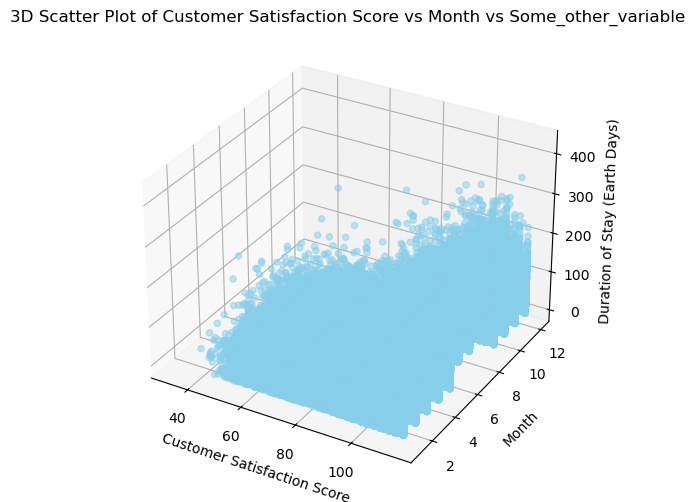

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(df['Customer Satisfaction Score'], df['Month'], df['Duration of Stay (Earth Days)'], color='skyblue', alpha=0.5)

# Set labels and title
ax.set_xlabel('Customer Satisfaction Score')
ax.set_ylabel('Month')
ax.set_zlabel('Duration of Stay (Earth Days)')
ax.set_title('3D Scatter Plot of Customer Satisfaction Score vs Month vs Some_other_variable')

plt.show()

### Correlation Heatmap of Customer Satisfaction Score

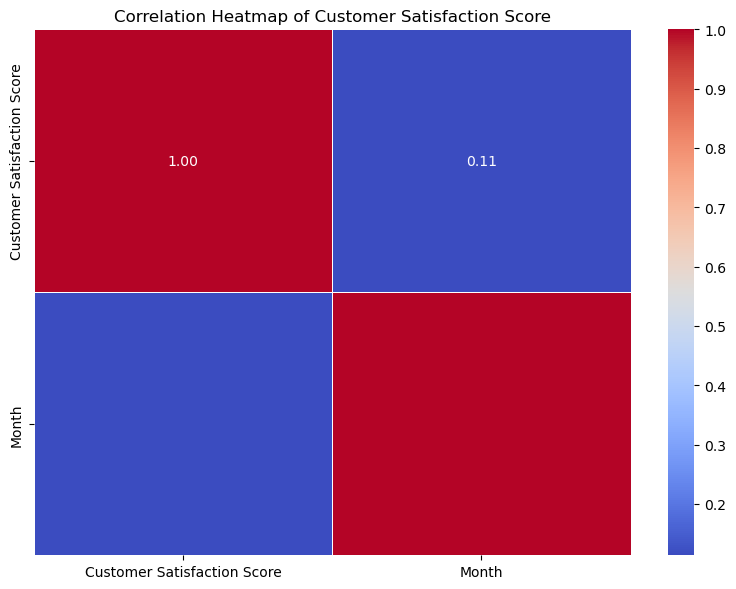

In [36]:

# Calculate correlation matrix
corr = df[['Customer Satisfaction Score', 'Month']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Customer Satisfaction Score')

# Show plot
plt.tight_layout()
plt.show()


### Line Plot of Customer Satisfaction Score

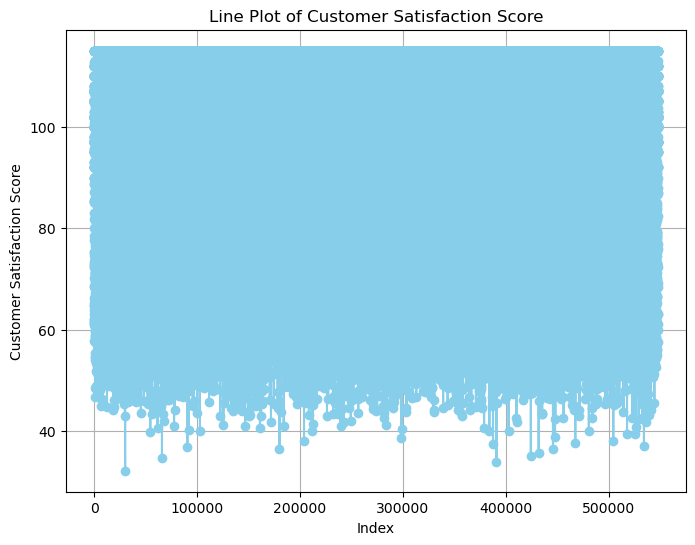

In [30]:

plt.figure(figsize=(8, 6))
plt.plot(df.index, df['Customer Satisfaction Score'], marker='o', color='skyblue')
plt.xlabel('Index')
plt.ylabel('Customer Satisfaction Score')
plt.title('Line Plot of Customer Satisfaction Score')
plt.grid(True)
plt.show()


### Hexbin Plot of Customer Satisfaction Score

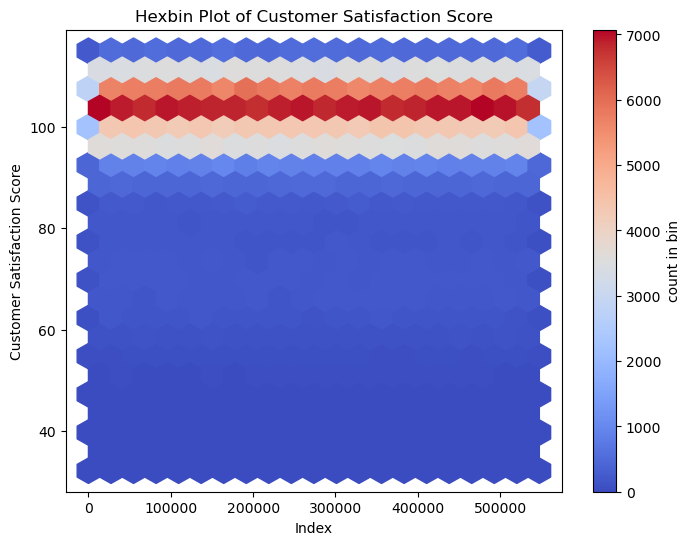

In [31]:
plt.figure(figsize=(8, 6))
plt.hexbin(df.index, df['Customer Satisfaction Score'], gridsize=20, cmap='coolwarm')
plt.colorbar(label='count in bin')
plt.xlabel('Index')
plt.ylabel('Customer Satisfaction Score')
plt.title('Hexbin Plot of Customer Satisfaction Score')
plt.show()


### Parallel coordinates plot

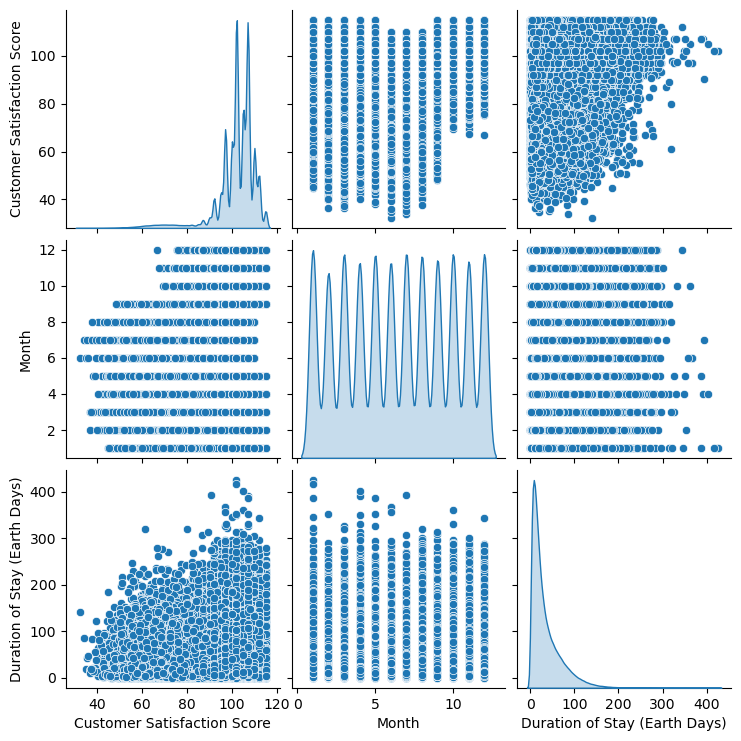

In [62]:
# Create a parallel coordinates plot
sns.pairplot(df[['Customer Satisfaction Score', 'Month', 'Duration of Stay (Earth Days)']], diag_kind="kde")
plt.show()

## Conclusions 

In [65]:
df.describe()

,Age,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Price (Galactic Credits),Month,Customer Satisfaction Score
count,547568.000000,547568.000000,547568.00000,547568.000000,547568.000000,547568.000000,547568.000000
mean,31.097029,8.333134,33.97513,1.107523,1034.273413,6.516975,101.660112
std,19.668694,24.073530,33.35670,1.094676,1384.904184,3.454901,9.292661
min,0.000000,0.000000,0.00000,0.000000,-6171.142478,1.000000,32.250000
25%,16.000000,0.980000,11.00000,0.000000,271.827658,4.000000,100.000000
50%,27.000000,2.710000,22.00000,1.000000,634.563876,7.000000,102.000000
75%,43.000000,7.450000,47.00000,2.000000,1306.127813,10.000000,107.000000
max,99.000000,2625.910000,426.00000,13.000000,103134.110795,12.000000,115.000000


## Reflections

My reflections based on this assignment and the previous one include :

### The use of MS Excel for data analysis:

My experience with MS Excel was not that bad, only now I have started noticing the limitations of Excel for large-scale data analysis, especially on a slower computer. Cleaning 50,000+ rows of data was a tedious, time-consuming process. The constant calculations and manipulations made my computer sluggish, further hindering productivity.

### The use of Python for data analysis:

My experience with Python has been seamless, below I have highlighted 2 factors that set apart Excel from Python:  
    
1. Speed and Efficiency: Python automates data cleaning tasks with code. This eliminates the need for manual manipulation, significantly reducing processing time. My computer no longer struggled, allowing me to work efficiently.

2. 
Focus on Insights: With Python handling the grunt work, I could focus on the bigger picture – analyzing the data and extracting valuable insights. This shift freed me from time-consuming cleaning and made the entire process more enjoyabl

### Future Decisions:
In the future, I would choose my dataset wisely because that plays a pivotal role in the insights that will be derived from that data. I would also try to conduct more extensive data-cleaning processes with a more defined objective 

### Technological Gaps 
Python libraries specifically designed for data cleaning, like Pandase

### Take Aways:
This experience taught me the importance of choosing the right tool for the job.  While Excel might be suitable for smaller datasets or quick calculations, Python's automation and speed make it far better suited for analyzing large datasets on slower computers.  It empowers me to overcome limitations and focus on what truly matters – uncovering hidden stories within the data.  Moving forward, I'd like to delve deeper into Python libraries specifically designed for data cleaning and explore techniques to further optimize my workflow.  Additionally, I recognize the need to strengthen my understanding of statistical concepts to fully leverage the insights revealed by Python's data analysis capabilities and frameworks. 

## Annexure

#### Warning Encountered: use_inf_as_na
use_inf_as_na option is deprecated and will be removed in a future version

Because Seaborn encountered "inf" (infinity) values in the data and is treating them in a way that will be deprecated in future versions.
For the purposes of this micro-study, I have decided to suppress the warning on the above section however for future studies it is better to identify and replace infinity values with NaN (Not a Number) before plotting the KDE. (Refer to 1.3.6)

    Suggested code to do this :
    # Replace inf with NaN
    " df['Customer Satisfaction Score'] = df['Customer Satisfaction Score'].replace([np.inf, -np.inf], np.nan) "

Below is a practical view of how the error looks like. 

C:\Users\mobil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



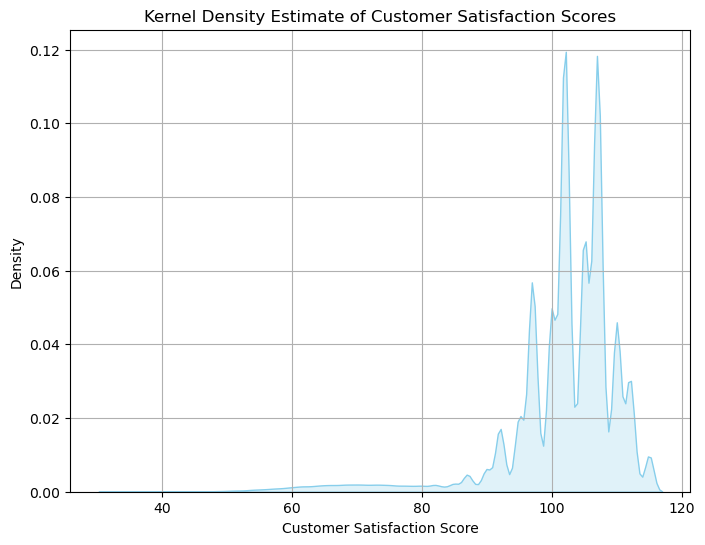

In [43]:
#Kernel Density Estimate  of Customer Satisfaction Score Graph

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Customer Satisfaction Score'], fill=True, color='skyblue')  # Update shade to fill
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Customer Satisfaction Scores')
plt.grid(True)
plt.show()

## Bibliography

### Dataset: 

https://www.kaggle.com/datasets/anthonytherrien/interstellar-travel-customer-satisfaction-analysis

### GitHub Link